# Hemocyte Recruitment Analysis - exploratory analyis
This notebook takes dataframes of abdomen and hemocyte features produced by the notebook scale_coordinates_midsections.ipynb and produces visualizations of distributions across experimental groups for -
1. abdomen area 
2. total number of hemocytes detected
3. number of hemocytes detected per mm2 of abdomen area 
4. number/proportion/percent of hemocytes at distances away from abdomen centroid

Sections from the middle of the abdomen that are comparable across experimental groups are included. 

## Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from pathlib import Path
import glob
from scipy import stats 

sns.set_style('white')
sns.set(font_scale=1.5)

color_scheme = {"Fed": "dodgerblue","Starved": "darkorange"}

import warnings
warnings.filterwarnings('ignore')

## Set up input/output directories

In [2]:

base_path = Path("/Users/sbandya/Desktop/hemocyte_recruitment_image_quantification/")
outputs = base_path.joinpath('results','v2_allbatches')

hemocyte_coordinates = pd.read_csv(outputs.joinpath("hemocyte_coordinates_consolidated.csv"), sep="\t",header=0)
abdomen_coordinates = pd.read_csv(outputs.joinpath("abdomen_coordinates_consolidated.csv"), sep="\t",header=0) 

area = "Area px^2"

## Aggregate features by fly 

<Axes: xlabel='condition,fly_ID', ylabel='number of sections'>

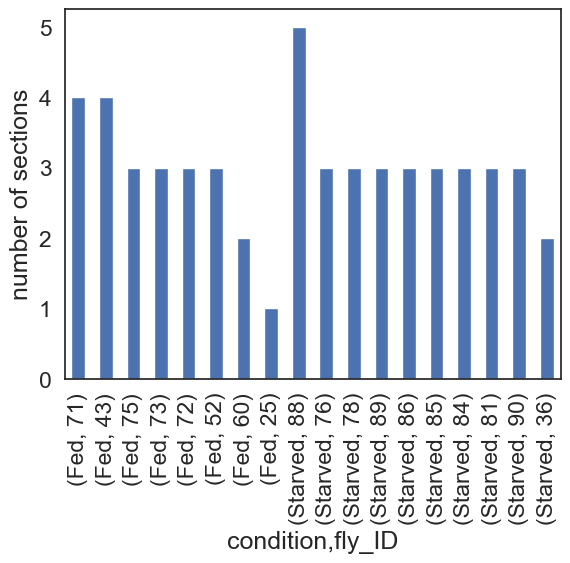

In [3]:
sns.set_style("white")
perfly_mean = abdomen_coordinates[['fly_ID', "condition", area,"Num Detections"]].groupby(['fly_ID', 'condition']).mean()
perfly_median = abdomen_coordinates[['fly_ID', "condition", area,"Num Detections"]].groupby(['fly_ID', 'condition']).median()
perfly_mean = perfly_mean.reset_index()
perfly_median = perfly_median.reset_index()

abdomen_coordinates[['condition','fly_ID']].groupby(['condition']).value_counts().plot(kind="bar", 
                                                                                                 ylabel="number of sections"
                                                                                                 )



## Distribution of abdomen areas in fed and starved samples

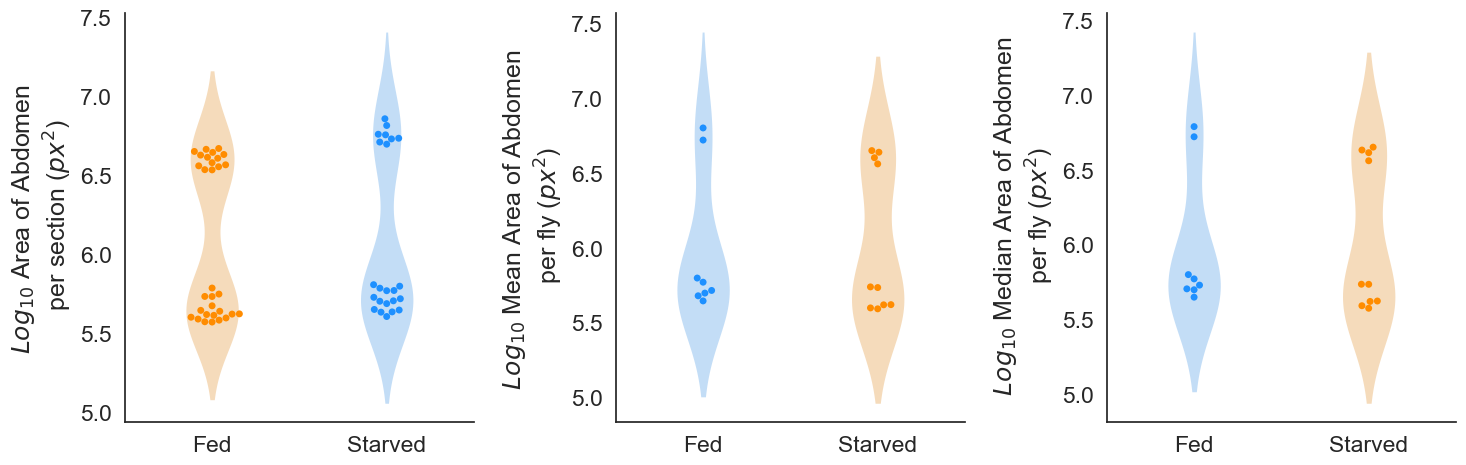

In [4]:
sns.set(font_scale=1.5)
sns.set_style("white")
fig, ax = plt.subplots(1,3, figsize=(15,5))

## Per section 
sns.violinplot(y= np.log10(abdomen_coordinates[area]), x= abdomen_coordinates['condition'], ax= ax[0],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3,alpha=0.3)
sns.swarmplot(y= np.log10(abdomen_coordinates[area]), x= abdomen_coordinates['condition'], ax= ax[0], palette=color_scheme)
ax[0].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[0].set_ylabel("$Log_{10}$ Area of Abdomen \n per section ($px^2$)")
ax[0].set_xlabel("")

## Per fly mean 
sns.violinplot(y= np.log10(perfly_mean[area]), x= perfly_mean['condition'], ax= ax[1],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3,alpha=0.3)
sns.swarmplot(y= np.log10(perfly_mean[area]), x= perfly_mean['condition'], ax= ax[1], palette=color_scheme)
ax[1].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[1].set_ylabel(" $Log_{10}$ Mean Area of Abdomen  \n per fly ($px^2$)")
ax[1].set_xlabel("")
## Per fly median
sns.violinplot(y= np.log10(perfly_median[area]), x= perfly_median['condition'], ax= ax[2],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3)
sns.swarmplot(y= np.log10(perfly_median[area]), x= perfly_median['condition'], ax= ax[2], palette=color_scheme)
ax[2].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[2].set_ylabel(" $Log_{10}$ Median Area of Abdomen \n per fly ($px^2$)")
ax[2].set_xlabel("")

sns.despine(right = True)

fig.tight_layout()
fig.savefig(outputs.joinpath("abdomen_area.png"))






## Hypothesis testing for area of abdomen

In [5]:
## Per section
print("per section :")
print("fed > starved: ", stats.ttest_ind(abdomen_coordinates[abdomen_coordinates['condition'] == 'Fed'][area],
                abdomen_coordinates[abdomen_coordinates['condition'] == 'Starved'][area],
                alternative="greater"))
print("two-sided: ", stats.ttest_ind(abdomen_coordinates[abdomen_coordinates['condition'] == 'Fed'][area],
                abdomen_coordinates[abdomen_coordinates['condition'] == 'Starved'][area],
                alternative="two-sided"))
print("fed > starved: ", stats.mannwhitneyu(abdomen_coordinates[abdomen_coordinates['condition'] == 'Fed'][area],
                abdomen_coordinates[abdomen_coordinates['condition'] == 'Starved'][area],
                alternative="greater"))
print("two-sided: ", stats.mannwhitneyu(abdomen_coordinates[abdomen_coordinates['condition'] == 'Fed'][area],
                abdomen_coordinates[abdomen_coordinates['condition'] == 'Starved'][area],
                alternative="two-sided"))

print("\n")
print("per fly - mean :")
print("fed > starved: ",stats.ttest_ind(perfly_mean[perfly_mean['condition'] == 'Fed'][area],
                perfly_mean[perfly_mean['condition'] == 'Starved'][area],
                alternative="greater"))
print("two-sided: ",stats.ttest_ind(perfly_mean[perfly_mean['condition'] == 'Fed'][area],
                perfly_mean[perfly_mean['condition'] == 'Starved'][area],
                alternative="two-sided"))                
print("fed > starved: ",stats.mannwhitneyu(perfly_mean[perfly_mean['condition'] == 'Fed'][area],
                perfly_mean[perfly_mean['condition'] == 'Starved'][area],
                alternative="greater"))
print("two-sided: ",stats.mannwhitneyu(perfly_mean[perfly_mean['condition'] == 'Fed'][area],
                perfly_mean[perfly_mean['condition'] == 'Starved'][area],
                alternative="two-sided"))       

print("\n")
print("per fly - median :")
print("fed > starved: ", stats.ttest_ind(perfly_median[perfly_median['condition'] == 'Fed'][area],
                perfly_median[perfly_median['condition'] == 'Starved'][area],
                alternative="greater"))
print("two-sided:  ", stats.ttest_ind(perfly_median[perfly_median['condition'] == 'Fed'][area],
                perfly_median[perfly_median['condition'] == 'Starved'][area],
                alternative="two-sided"))
print("fed > starved: ", stats.mannwhitneyu(perfly_median[perfly_median['condition'] == 'Fed'][area],
                perfly_median[perfly_median['condition'] == 'Starved'][area],
                alternative="greater"))
print("two-sided: ", stats.mannwhitneyu(perfly_median[perfly_median['condition'] == 'Fed'][area],
                perfly_median[perfly_median['condition'] == 'Starved'][area],
                alternative="two-sided"))

per section :
fed > starved:  TtestResult(statistic=0.46084807809466577, pvalue=0.32341465051393314, df=52.0)
two-sided:  TtestResult(statistic=0.46084807809466577, pvalue=0.6468293010278663, df=52.0)
fed > starved:  MannwhitneyuResult(statistic=445.0, pvalue=0.061855194967143416)
two-sided:  MannwhitneyuResult(statistic=445.0, pvalue=0.12371038993428683)


per fly - mean :
fed > starved:  TtestResult(statistic=-0.07436097044849747, pvalue=0.529177536014959, df=16.0)
two-sided:  TtestResult(statistic=-0.07436097044849747, pvalue=0.9416449279700818, df=16.0)
fed > starved:  MannwhitneyuResult(statistic=48.0, pvalue=0.2573929338635221)
two-sided:  MannwhitneyuResult(statistic=48.0, pvalue=0.5147858677270442)


per fly - median :
fed > starved:  TtestResult(statistic=-0.09275984745066222, pvalue=0.5363770448528403, df=16.0)
two-sided:   TtestResult(statistic=-0.09275984745066222, pvalue=0.9272459102943195, df=16.0)
fed > starved:  MannwhitneyuResult(statistic=48.0, pvalue=0.25739293386352

## Distribution of total hemocyte detections in fed and starved samples

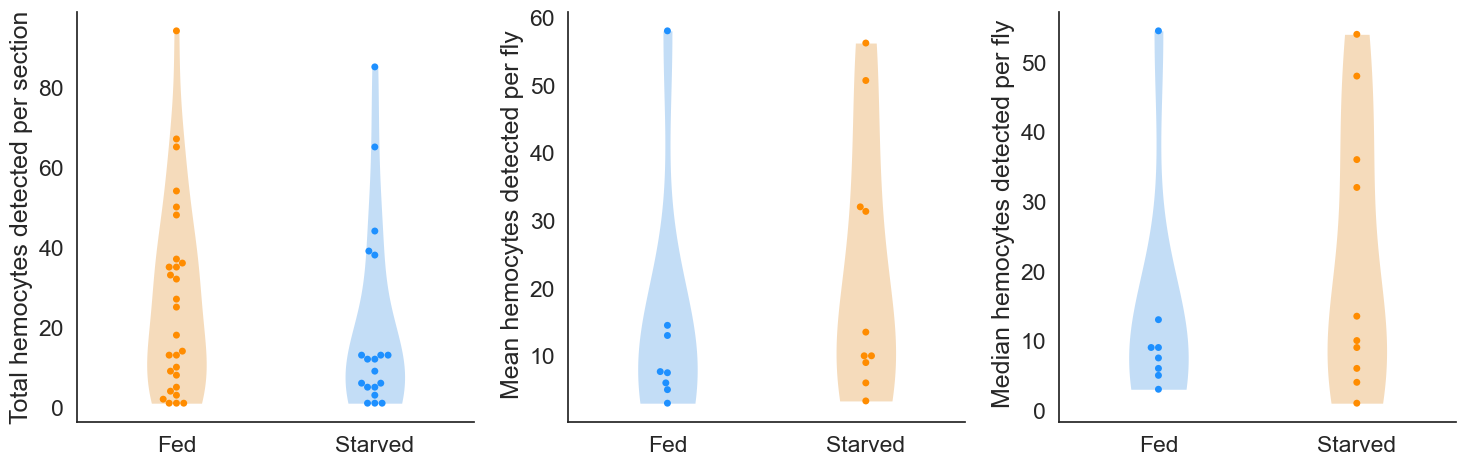

In [6]:
sns.set(font_scale=1.5)
sns.set_style("white")
fig, ax = plt.subplots(1,3, figsize=(15,5))

## Per section 
sns.violinplot(y= abdomen_coordinates['Num Detections'], x= abdomen_coordinates['condition'], ax= ax[0],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3,alpha=0.3, cut=0)
sns.swarmplot(y= abdomen_coordinates['Num Detections'], x= abdomen_coordinates['condition'], ax= ax[0], palette=color_scheme)
ax[0].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[0].set_ylabel("Total hemocytes detected per section")
ax[0].set_xlabel("")

## Per fly mean 
sns.violinplot(y= perfly_mean['Num Detections'], x= perfly_mean['condition'], ax= ax[1],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3,alpha=0.3, cut=0)
sns.swarmplot(y= perfly_mean['Num Detections'], x= perfly_mean['condition'], ax= ax[1], palette=color_scheme)
ax[1].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[1].set_ylabel(" Mean hemocytes detected per fly")
ax[1].set_xlabel("")
## Per fly median
sns.violinplot(y= perfly_median['Num Detections'], x= perfly_median['condition'], ax= ax[2],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3, cut=0)
sns.swarmplot(y= perfly_median['Num Detections'], x= perfly_median['condition'], ax= ax[2], palette=color_scheme)
ax[2].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[2].set_ylabel(" Median hemocytes detected per fly")
ax[2].set_xlabel("")

sns.despine(right = True)

fig.tight_layout()
fig.savefig(outputs.joinpath("total_hemocytes_detected.png"))



## Hypothesis testing for total hemocytes detected

In [7]:
## Per section
print("per section :")
print("fed < starved: ", stats.ttest_ind(abdomen_coordinates[abdomen_coordinates['condition'] == 'Fed']['Num Detections'],
                abdomen_coordinates[abdomen_coordinates['condition'] == 'Starved']['Num Detections'],
                alternative="less"))
print("two-sided: ", stats.ttest_ind(abdomen_coordinates[abdomen_coordinates['condition'] == 'Fed']['Num Detections'],
                abdomen_coordinates[abdomen_coordinates['condition'] == 'Starved']['Num Detections'],
                alternative="two-sided"))
print("fed < starved: ",stats.mannwhitneyu(abdomen_coordinates[abdomen_coordinates['condition'] == 'Fed']['Num Detections'],
                abdomen_coordinates[abdomen_coordinates['condition'] == 'Starved']['Num Detections'],
                alternative="less"))
print("two-sided: ",stats.mannwhitneyu(abdomen_coordinates[abdomen_coordinates['condition'] == 'Fed']['Num Detections'],
                abdomen_coordinates[abdomen_coordinates['condition'] == 'Starved']['Num Detections'],
                alternative="two-sided"))

print("\n")               
print("per fly - mean :")
print("fed < starved: ", stats.ttest_ind(perfly_mean[perfly_mean['condition'] == 'Fed']['Num Detections'],
                perfly_mean[perfly_mean['condition'] == 'Starved']['Num Detections'],
                alternative="less"))
print("two-sided: ",stats.ttest_ind(perfly_mean[perfly_mean['condition'] == 'Fed']['Num Detections'],
                perfly_mean[perfly_mean['condition'] == 'Starved']['Num Detections'],
                alternative="two-sided"))
print("fed < starved: ", stats.mannwhitneyu(perfly_mean[perfly_mean['condition'] == 'Fed']['Num Detections'],
                perfly_mean[perfly_mean['condition'] == 'Starved']['Num Detections'],
                alternative="less"))
print("two-sided: ", stats.mannwhitneyu(perfly_mean[perfly_mean['condition'] == 'Fed']['Num Detections'],
                perfly_mean[perfly_mean['condition'] == 'Starved']['Num Detections'],
                alternative="two-sided"))
                
print("\n")      
print("per fly - median :")
print("fed < starved: ",stats.ttest_ind(perfly_median[perfly_median['condition'] == 'Fed']['Num Detections'],
                perfly_median[perfly_median['condition'] == 'Starved']['Num Detections'],
                alternative="less"))
print("two-sided: ",stats.ttest_ind(perfly_median[perfly_median['condition'] == 'Fed']['Num Detections'],
                perfly_median[perfly_median['condition'] == 'Starved']['Num Detections'],
                alternative="two-sided"))
print("fed < starved: ",stats.mannwhitneyu(perfly_median[perfly_median['condition'] == 'Fed']['Num Detections'],
                perfly_median[perfly_median['condition'] == 'Starved']['Num Detections'],
                alternative="less"))
print("two-sided: ",stats.mannwhitneyu(perfly_median[perfly_median['condition'] == 'Fed']['Num Detections'],
                perfly_median[perfly_median['condition'] == 'Starved']['Num Detections'],
                alternative="two-sided"))

per section :
fed < starved:  TtestResult(statistic=nan, pvalue=nan, df=nan)
two-sided:  TtestResult(statistic=nan, pvalue=nan, df=nan)
fed < starved:  MannwhitneyuResult(statistic=nan, pvalue=nan)
two-sided:  MannwhitneyuResult(statistic=nan, pvalue=nan)


per fly - mean :
fed < starved:  TtestResult(statistic=-0.88712325641261, pvalue=0.19407659196409655, df=16.0)
two-sided:  TtestResult(statistic=-0.88712325641261, pvalue=0.3881531839281931, df=16.0)
fed < starved:  MannwhitneyuResult(statistic=27.5, pvalue=0.1429114172842696)
two-sided:  MannwhitneyuResult(statistic=27.5, pvalue=0.2858228345685392)


per fly - median :
fed < starved:  TtestResult(statistic=-0.9156465231596186, pvalue=0.1867234467620813, df=16.0)
two-sided:  TtestResult(statistic=-0.9156465231596186, pvalue=0.3734468935241626, df=16.0)
fed < starved:  MannwhitneyuResult(statistic=30.5, pvalue=0.21135106759763167)
two-sided:  MannwhitneyuResult(statistic=30.5, pvalue=0.42270213519526334)


## Number of hemocytes at distance away from abdomen centroid

In [8]:
#Add experimental group info to hemocyte detections
image_condition = pd.Series(abdomen_coordinates.condition.values, index=abdomen_coordinates.Image).to_dict()
hemocyte_coordinates['condition'] = hemocyte_coordinates['Image'].map(image_condition)

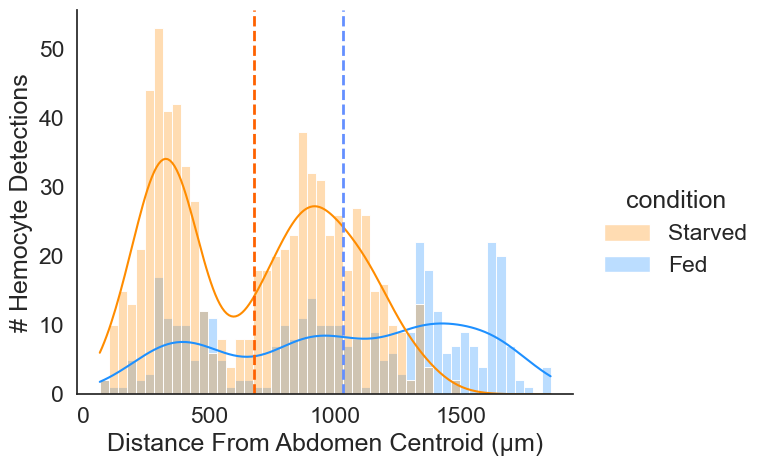

In [9]:

centroid_distance_dist = sns.displot(data=hemocyte_coordinates, x='centroid_distances', hue='condition',kde=True, bins=50,palette=color_scheme, alpha=0.3,
                                     height=5, aspect=1.25)
centroid_distance_dist.set(xlabel='Distance From Abdomen Centroid (µm)', ylabel='# Hemocyte Detections')

plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_distances'].mean(),
            color="#648fff",
            ls='--', 
            lw=2)


plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_distances'].mean(),
            color='#fe6100',
            ls='--', 
            lw=2)
#hemocyte_coordinates

In [10]:
# Scale all centroid distances by (sqrt of max dist of Fed abdomes * max dist of starved abdomens)*scaling_factor
max_fed = np.max(hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_distances'])
max_starved = np.max(hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_distances'])
scaling_factor = 1/100
print(np.sqrt(max_fed*max_starved)*scaling_factor) 
hemocyte_coordinates['scaled_centroid_distances'] = hemocyte_coordinates['centroid_distances']/(np.sqrt(max_fed*max_starved)*scaling_factor)

16.55837689445381


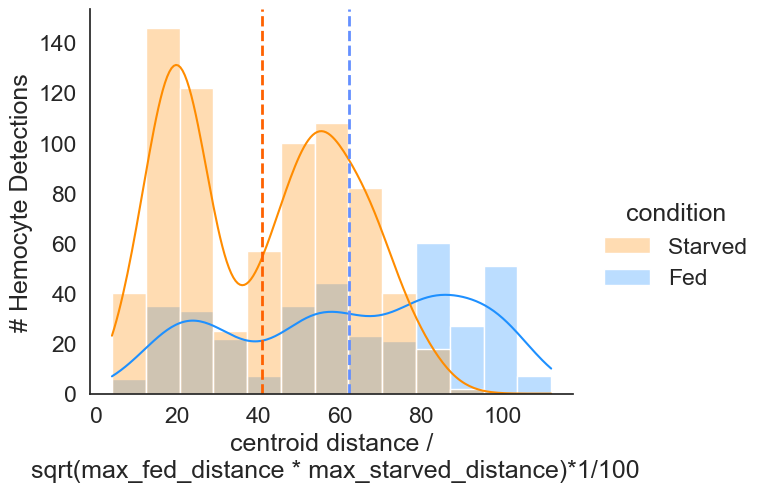

In [11]:
centroid_distance_dist = sns.displot(data=hemocyte_coordinates, x='scaled_centroid_distances', hue='condition',kde=True,palette=color_scheme, alpha=0.3,
                                     height=5, aspect=1.25)
centroid_distance_dist.set(xlabel='centroid distance /\n sqrt(max_fed_distance * max_starved_distance)*1/100', ylabel='# Hemocyte Detections')

plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['scaled_centroid_distances'].mean(),
            color="#648fff",
            ls='--', 
            lw=2)


plt.axvline(x= hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['scaled_centroid_distances'].mean(),
            color='#fe6100',
            ls='--', 
            lw=2)
#hemocyte_coordinates

## Percent area of abdomen occupied by hemocytes

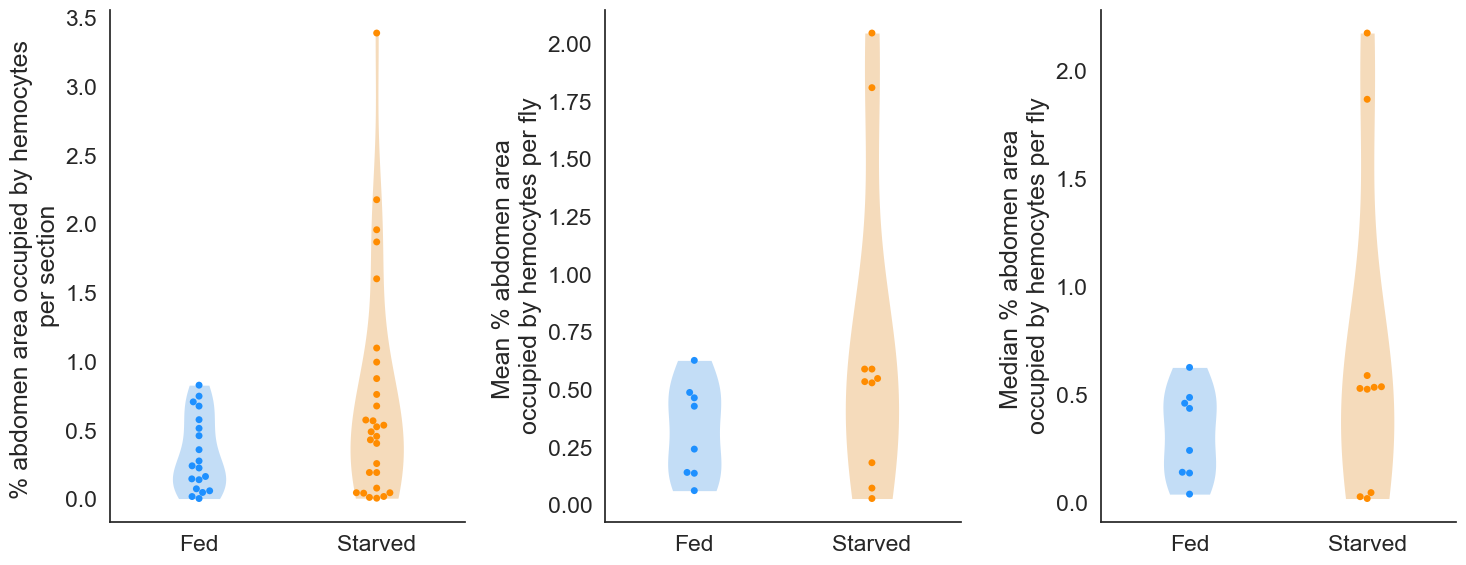

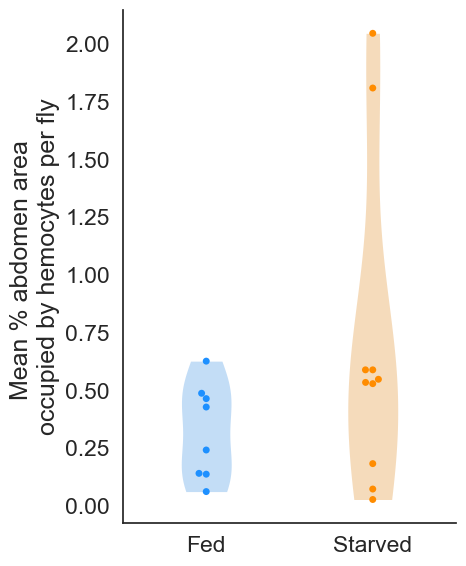

In [12]:
def get_abdomen_area(image, abdomen_features):
    abdomen_area = abdomen_features.loc[abdomen_features['Image'] == image][area].item()
    return(abdomen_area)

#hemocyte_coordinates['abdomen_area'] = hemocyte_coordinates.apply(lambda x: get_abdomen_area(image=x.Image, abdomen_features=abdomen_coordinates), axis=1) 
percent_area_hemocytes_persection = hemocyte_coordinates[['Image','condition','fly_ID','Cell: Area']].groupby(['Image','condition','fly_ID']).sum()
percent_area_hemocytes_persection = percent_area_hemocytes_persection.reset_index()
percent_area_hemocytes_persection['abdomen_area'] = percent_area_hemocytes_persection.apply(lambda x: get_abdomen_area(x.Image, abdomen_features=abdomen_coordinates), axis=1) 
percent_area_hemocytes_persection['percent_area_hemocytes'] = 100*(percent_area_hemocytes_persection['Cell: Area']/percent_area_hemocytes_persection['abdomen_area'])

percent_area_hemocytes_perlfy_mean = percent_area_hemocytes_persection[['fly_ID','condition','percent_area_hemocytes']].groupby(['fly_ID', 'condition']).mean()
percent_area_hemocytes_perlfy_mean = percent_area_hemocytes_perlfy_mean.reset_index()
percent_area_hemocytes_perlfy_median = percent_area_hemocytes_persection[['fly_ID','condition','percent_area_hemocytes']].groupby(['fly_ID', 'condition']).median()
percent_area_hemocytes_perlfy_median = percent_area_hemocytes_perlfy_median.reset_index()

fig, ax = plt.subplots(1,3, figsize=(15,6))
## Per section
sns.violinplot(y= percent_area_hemocytes_persection['percent_area_hemocytes'], x= percent_area_hemocytes_persection['condition'], ax= ax[0],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3, cut=0)
sns.swarmplot(y= percent_area_hemocytes_persection['percent_area_hemocytes'], x= percent_area_hemocytes_persection['condition'], ax= ax[0], palette=color_scheme)
ax[0].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[0].set_ylabel("% abdomen area occupied by hemocytes \n per section ")
ax[0].set_xlabel("")

## Per fly mean
sns.violinplot(y= percent_area_hemocytes_perlfy_mean['percent_area_hemocytes'], x= percent_area_hemocytes_perlfy_mean['condition'], ax= ax[1],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3, cut=0)
sns.swarmplot(y= percent_area_hemocytes_perlfy_mean['percent_area_hemocytes'], x= percent_area_hemocytes_perlfy_mean['condition'], 
ax= ax[1], palette=color_scheme)
ax[1].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[1].set_ylabel("Mean % abdomen area \n occupied by hemocytes per fly ")
ax[1].set_xlabel("")

## per fly median
sns.violinplot(y= percent_area_hemocytes_perlfy_median['percent_area_hemocytes'], x= percent_area_hemocytes_perlfy_median['condition'], ax= ax[2],
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3, cut=0)
sns.swarmplot(y= percent_area_hemocytes_perlfy_median['percent_area_hemocytes'], x= percent_area_hemocytes_perlfy_median['condition'], ax= ax[2], palette=color_scheme)
ax[2].set_xticklabels(['Fed', 'Starved'], rotation=0)
ax[2].set_ylabel("Median % abdomen area \n occupied by hemocytes per fly ")
ax[2].set_xlabel("")

sns.despine(right = True)


fig.tight_layout()
fig.savefig(outputs.joinpath("percent_abdomen_area.png"))

fig, ax1 = plt.subplots(figsize=(5,6))
sns.violinplot(y= percent_area_hemocytes_perlfy_mean['percent_area_hemocytes'], x= percent_area_hemocytes_perlfy_mean['condition'], ax= ax1,
               inner=None, linewidth = 0, palette=color_scheme, width=0.3, alpha=0.3, cut=0)
sns.swarmplot(y= percent_area_hemocytes_perlfy_mean['percent_area_hemocytes'], x= percent_area_hemocytes_perlfy_mean['condition'], 
              ax= ax1, palette=color_scheme)
ax1.set_xticklabels(['Fed', 'Starved'], rotation=0)
ax1.set_ylabel("Mean % abdomen area \n occupied by hemocytes per fly ")
ax1.set_xlabel("")
sns.despine(right = True)


fig.tight_layout()
fig.savefig(outputs.joinpath("mean_percent_abdomen_area.png"))

## Hypothesis testing for percent abdomen area occupied by hemocytes 

In [13]:

print("per section :")
print("fed < starved: ",stats.ttest_ind(percent_area_hemocytes_persection[percent_area_hemocytes_persection['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_persection[percent_area_hemocytes_persection['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="less"))
print("two-sided: ",stats.ttest_ind(percent_area_hemocytes_persection[percent_area_hemocytes_persection['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_persection[percent_area_hemocytes_persection['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="two-sided"))
print("fed < starved: ",stats.mannwhitneyu(percent_area_hemocytes_persection[percent_area_hemocytes_persection['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_persection[percent_area_hemocytes_persection['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="less"))
print("two-sided: ",stats.mannwhitneyu(percent_area_hemocytes_persection[percent_area_hemocytes_persection['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_persection[percent_area_hemocytes_persection['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="two-sided"))

print("\n")
print("per fly - mean :")
print("fed < starved: ",stats.ttest_ind(percent_area_hemocytes_perlfy_mean[percent_area_hemocytes_perlfy_mean['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_perlfy_mean[percent_area_hemocytes_perlfy_mean['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="less"))
print("two-sided: ",stats.ttest_ind(percent_area_hemocytes_perlfy_mean[percent_area_hemocytes_perlfy_mean['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_perlfy_mean[percent_area_hemocytes_perlfy_mean['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="two-sided"))
print("fed < starved: ",stats.mannwhitneyu(percent_area_hemocytes_perlfy_mean[percent_area_hemocytes_perlfy_mean['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_perlfy_mean[percent_area_hemocytes_perlfy_mean['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="less"))
print("two-sided: ",stats.mannwhitneyu(percent_area_hemocytes_perlfy_mean[percent_area_hemocytes_perlfy_mean['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_perlfy_mean[percent_area_hemocytes_perlfy_mean['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="two-sided"))

print("\n")                
print("per fly - median :")
print("fed < starved: ",stats.ttest_ind(percent_area_hemocytes_perlfy_median[percent_area_hemocytes_perlfy_median['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_perlfy_median[percent_area_hemocytes_perlfy_median['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="less"))
print("two-sided: ",stats.ttest_ind(percent_area_hemocytes_perlfy_median[percent_area_hemocytes_perlfy_median['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_perlfy_median[percent_area_hemocytes_perlfy_median['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="two-sided"))
print("fed < starved: ",stats.mannwhitneyu(percent_area_hemocytes_perlfy_median[percent_area_hemocytes_perlfy_median['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_perlfy_median[percent_area_hemocytes_perlfy_median['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="less"))
print("two-sided: ",stats.mannwhitneyu(percent_area_hemocytes_perlfy_median[percent_area_hemocytes_perlfy_median['condition'] == 'Fed']['percent_area_hemocytes'],
                percent_area_hemocytes_perlfy_median[percent_area_hemocytes_perlfy_median['condition'] == 'Starved']['percent_area_hemocytes'],
                alternative="two-sided"))

per section :
fed < starved:  TtestResult(statistic=-2.0456828321380893, pvalue=0.023329663629374844, df=45.0)
two-sided:  TtestResult(statistic=-2.0456828321380893, pvalue=0.04665932725874969, df=45.0)
fed < starved:  MannwhitneyuResult(statistic=200.0, pvalue=0.07781947893198549)
two-sided:  MannwhitneyuResult(statistic=200.0, pvalue=0.15563895786397097)


per fly - mean :
fed < starved:  TtestResult(statistic=-1.459768695696594, pvalue=0.08185460415191076, df=16.0)
two-sided:  TtestResult(statistic=-1.459768695696594, pvalue=0.16370920830382152, df=16.0)
fed < starved:  MannwhitneyuResult(statistic=25.0, pvalue=0.10153571918277801)
two-sided:  MannwhitneyuResult(statistic=25.0, pvalue=0.20307143836555602)


per fly - median :
fed < starved:  TtestResult(statistic=-1.3309351846256625, pvalue=0.1009332056591639, df=16.0)
two-sided:  TtestResult(statistic=-1.3309351846256625, pvalue=0.2018664113183278, df=16.0)
fed < starved:  MannwhitneyuResult(statistic=28.0, pvalue=0.157708304767128

## Hemocyte spatial density across replicates 

371 740


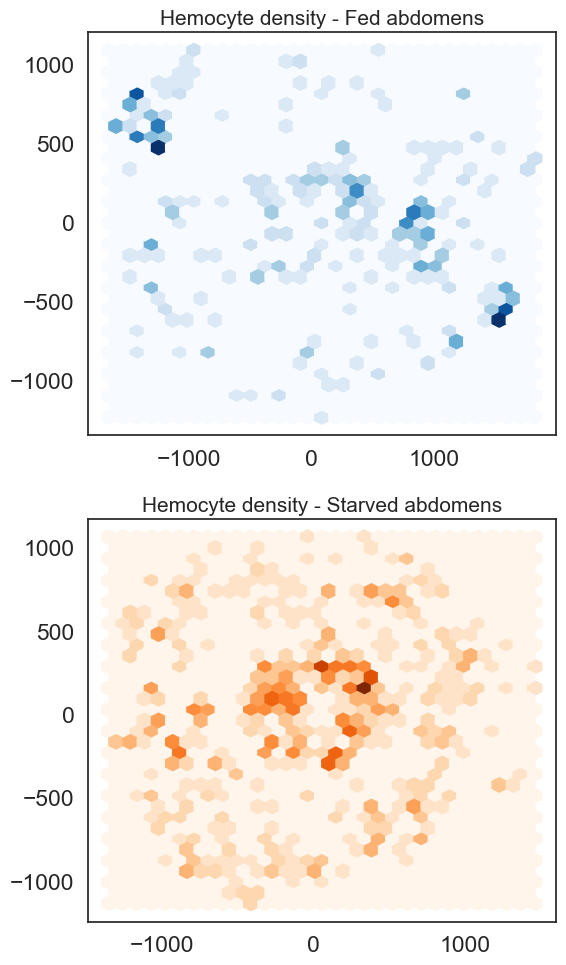

In [14]:
# point density plot - all replicates per group 
fig, ax = plt.subplots(2,1,figsize=(6,10))
fed_x = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_x_zeroscaled']
fed_y = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Fed"]['centroid_y_zeroscaled']

starved_x = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_x_zeroscaled']
starved_y = hemocyte_coordinates.loc[hemocyte_coordinates['condition']=="Starved"]['centroid_y_zeroscaled']

print(len(fed_x),len(starved_x))

ax[0].hexbin(fed_x,fed_y, bins=15, gridsize=30,cmap = "Blues")
ax[0].set_title("Hemocyte density - Fed abdomens", fontsize=15)
#ax[0].set_xlim(-400,400)
#ax[0].set_ylim(-300,300)

ax[1].hexbin(starved_x, starved_y, bins=15, gridsize=30, cmap = "Oranges")
ax[1].set_title("Hemocyte density - Starved abdomens", fontsize=15)
#ax[1].set_xlim(-400,400)
#ax[1].set_ylim(-300,300)

fig.tight_layout()
fig.savefig(outputs.joinpath("hemocyte_density_2Dhistogram.png"))

## Proportion of hemocytes at distances away from abdomen centroid 

In [15]:
# For each abdomen - 
# Take area of abdomen as circle and get radii of circle
# get distances away from centroid by splitting radii as R(sqrt(i/10)) where i is in [1,10] 
# How many hemocytes in each percentile away from abdomen center? 
from scipy.stats import percentileofscore
def get_hemcocyte_loc_percentile(centroid_distance, image_ID, hemocyte_measurements, adbomen_measurements):
#for fly in hemocyte_coordinates['Image'].unique():
    #print(fly)
    abdomen_area = adbomen_measurements.loc[adbomen_measurements['Image']==image_ID][area]
    radius = np.sqrt(abdomen_area.iloc[0]/np.pi)
    
    #radiipercentile = np.linspace(0, radius, 3)
    #hemocyte_at_percentile = percentileofscore(radiipercentile, centroid_distance)

    radiitenths = [radius*np.sqrt(i/10) for i in range(1,11)]
    #print(radiitenths)
    #print(centroid_distance)
    hemocyte_at_percentile = percentileofscore(radiitenths, centroid_distance)
    #print(hemocyte_at_percentile)

    return(hemocyte_at_percentile)

def get_hemcocyte_loc_percentile_maxdist(centroid_distance,image_ID,hemocyte_measurements):
    max_centroid_distance = hemocyte_measurements[hemocyte_measurements['Image']==image_ID]['centroid_distances'].max()
    split_distances = [max_centroid_distance*np.sqrt(i/10) for i in range(1,11)] 
    hemocyte_at_percentile = percentileofscore(split_distances, centroid_distance)
    return(hemocyte_at_percentile)
    

In [16]:
hemocyte_coordinates['hemocyte_at_percentile_distance'] = hemocyte_coordinates.apply(lambda row: 
                                                                            get_hemcocyte_loc_percentile(row['centroid_distances'], 
                                                                                                         row['Image'],
                                                                                                         hemocyte_coordinates,
                                                                                                         abdomen_coordinates), 
                                                                                                         axis=1)

hemocyte_coordinates['hemocyte_at_percentile_distance_maxdist'] = hemocyte_coordinates.apply(lambda row: 
                                                                            get_hemcocyte_loc_percentile_maxdist(row['centroid_distances'], 
                                                                                                         row['Image'],
                                                                                                         hemocyte_coordinates
                                                                                                         ), 
                                                                                                         axis=1)


#hemocyte_coordinates['hemocyte_at_percentile_distance'].value_counts()

[Text(0.5, 0, 'Percentile distance from abdomen centroid'),
 Text(0, 0.5, 'Proportion of Hemocyte Detections')]

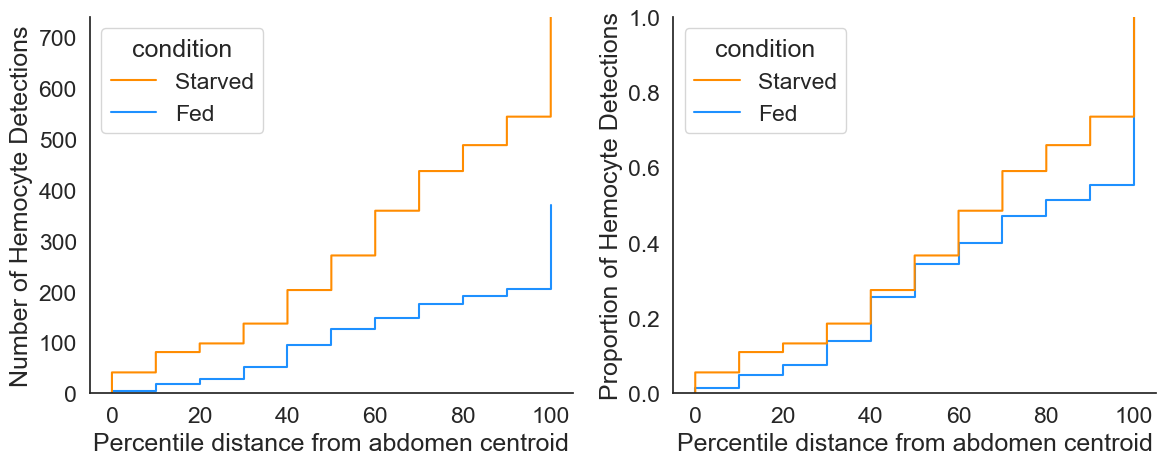

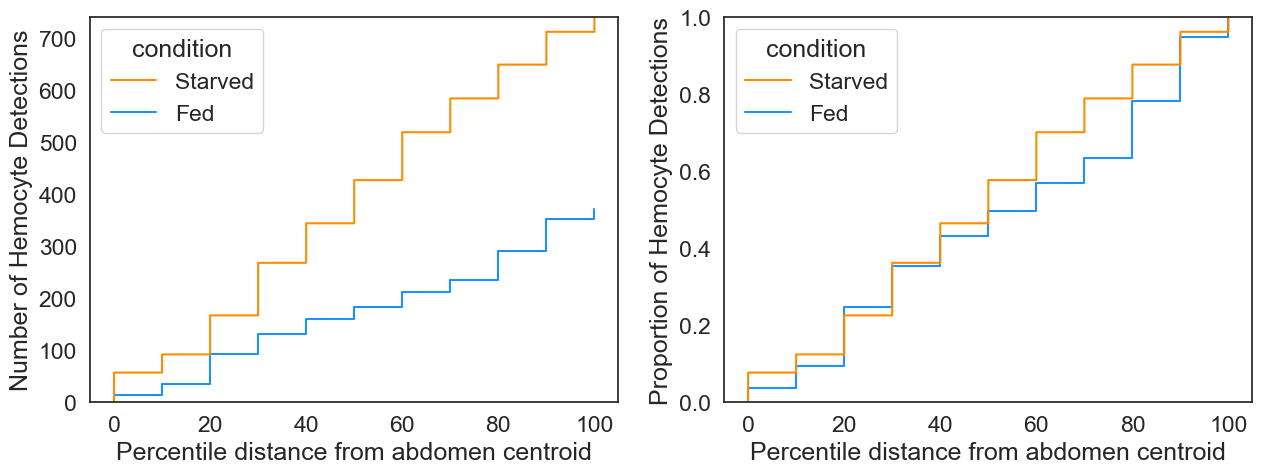

In [17]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.ecdfplot(data=hemocyte_coordinates, x="hemocyte_at_percentile_distance", 
                                              hue="condition", palette=color_scheme,stat="count",
                                              complementary=False, ax=ax[0])
ax[0].set(xlabel='Percentile distance from abdomen centroid', ylabel='Number of Hemocyte Detections')

sns.ecdfplot(data=hemocyte_coordinates, x="hemocyte_at_percentile_distance", 
                                              hue="condition", palette=color_scheme,stat="proportion",
                                              complementary=False, ax=ax[1])
ax[1].set(xlabel='Percentile distance from abdomen centroid', ylabel='Proportion of Hemocyte Detections')
#sns.ecdfplot(data=hemocyte_coordinates, x="hemocyte_at_percentile_distance", 
#                                              hue="condition", palette=color_scheme,stat="percent",
#                                              complementary=False, ax=ax[2])
#ax[2].set(xlabel='Percentile distance from abdomen centroid', ylabel='% Hemocyte Detections')
sns.despine(right=True)
fig.tight_layout()
fig.savefig(outputs.joinpath("proportion_percentile_distance_from_centroid.png"))

fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.ecdfplot(data=hemocyte_coordinates, x="hemocyte_at_percentile_distance_maxdist", 
                                              hue="condition", palette=color_scheme,stat="count",
                                              complementary=False, ax=ax[0])
ax[0].set(xlabel='Percentile distance from abdomen centroid', ylabel='Number of Hemocyte Detections')

sns.ecdfplot(data=hemocyte_coordinates, x="hemocyte_at_percentile_distance_maxdist", 
                                              hue="condition", palette=color_scheme,stat="proportion",
                                              complementary=False, ax=ax[1])
ax[1].set(xlabel='Percentile distance from abdomen centroid', ylabel='Proportion of Hemocyte Detections')

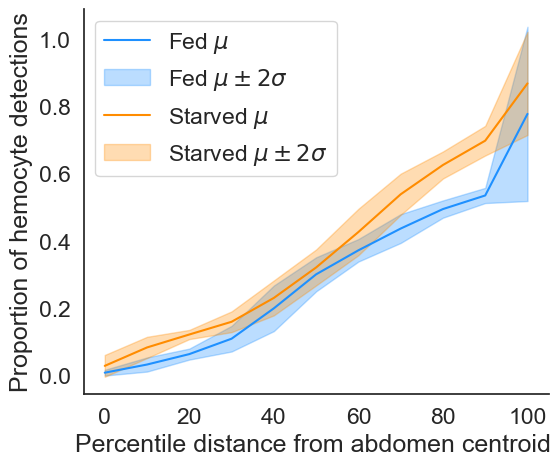

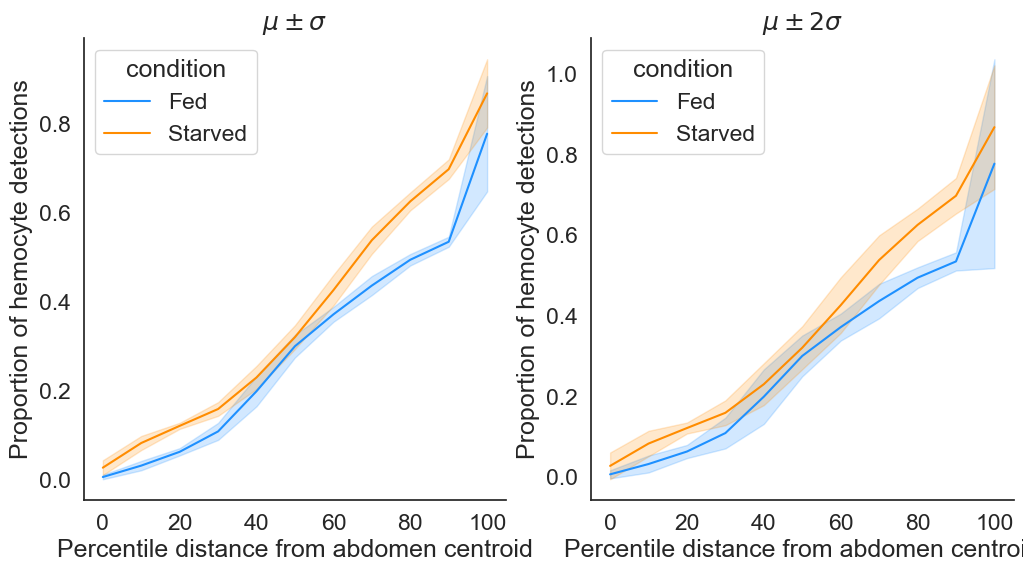

In [18]:
## Plot mean ECDF across replicates with std. deviation
from statsmodels.distributions.empirical_distribution import ECDF
fed_percentile_distance = ECDF(hemocyte_coordinates[hemocyte_coordinates['condition']=="Fed"]['hemocyte_at_percentile_distance'])
starved_percentile_distance = ECDF(hemocyte_coordinates[hemocyte_coordinates['condition']=="Starved"]['hemocyte_at_percentile_distance']) 

fed_percentile_distance_df = pd.DataFrame({'percentdist': fed_percentile_distance.x, 'proportion':fed_percentile_distance.y,
                                           'condition':'Fed'})
starved_percentile_distance_df = pd.DataFrame({'percentdist': starved_percentile_distance.x, 'proportion':starved_percentile_distance.y,
                                           'condition':'Starved'
    
})
percentile_distance_df = pd.concat([fed_percentile_distance_df,starved_percentile_distance_df])

percentile_distance_df['distance_cat'] = pd.cut(percentile_distance_df["percentdist"], 
                                                bins=[-np.inf,0,10,20,30,40,50,60,70,80,90,100],
                                                  labels=[0,10,20,30,40,50,60,70,80,90,100])
percentile_distance_df_mean = percentile_distance_df[['condition','distance_cat','proportion']].groupby(['condition','distance_cat']).agg(['mean','std'])
percentile_distance_df_mean = percentile_distance_df_mean.droplevel(0,axis=1).reset_index()
percentile_distance_df_mean['mean+sd'] = percentile_distance_df_mean['mean']+2*percentile_distance_df_mean['std']
percentile_distance_df_mean['mean-sd'] = percentile_distance_df_mean['mean']-2*percentile_distance_df_mean['std']
fed = percentile_distance_df_mean[percentile_distance_df_mean['condition']=='Fed']
starved = percentile_distance_df_mean[percentile_distance_df_mean['condition']=='Starved']

fig,ax =plt.subplots(figsize=(6,5))
ax.plot(fed['distance_cat'],fed['mean'],color="dodgerblue", label="Fed")
ax.fill_between(fed['distance_cat'],fed['mean+sd'], fed['mean-sd'], color="dodgerblue", alpha=0.3)
ax.plot(starved['distance_cat'],starved['mean'],color="darkorange", label="Starved")
ax.fill_between(starved['distance_cat'],starved['mean+sd'], starved['mean-sd'], color="darkorange", alpha=0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Percentile distance from abdomen centroid ")
ax.set_ylabel("Proportion of hemocyte detections")
ax.legend(['Fed $\mu$','Fed $\mu \pm 2\sigma$' , 'Starved $\mu$','Starved $\mu \pm 2\sigma$'])


percentile_distance_df_lp = percentile_distance_df.copy(deep=True)
percentile_distance_df_lp.replace([np.inf, -np.inf], 0, inplace=True)
percentile_distance_df_lp.dropna(subset=["percentdist"], how="all", inplace=True)
percentile_distance_df_lp['percentdist_int'] = percentile_distance_df_lp['percentdist'].astype('int64')

fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.lineplot(
    data=percentile_distance_df_lp, 
    x="percentdist_int", y="proportion", errorbar="sd", hue="condition", palette=color_scheme, ax=ax[0],
)
sns.lineplot(
    data=percentile_distance_df_lp, 
    x="percentdist_int", y="proportion", errorbar=("sd",2), hue="condition", palette=color_scheme, ax=ax[1],
)
ax[0].set_xlabel("Percentile distance from abdomen centroid")
ax[0].set_ylabel("Proportion of hemocyte detections")
ax[1].set_xlabel("Percentile distance from abdomen centroid")
ax[1].set_ylabel("Proportion of hemocyte detections")

ax[0].set_title("$\mu \pm \sigma$")
ax[1].set_title("$\mu \pm 2\sigma$")

sns.despine(right=True)


### Keeping the replicates separate and getting ECDFs for each replicate. 
### Max radii is max hemocyte distance

    percentile_distance  hemocyte_proportion            image condition  \
0                  -inf             0.000000  85E_5_merge.tif   Starved   
1                  10.0             0.100000  85E_5_merge.tif   Starved   
2                  30.0             0.200000  85E_5_merge.tif   Starved   
3                  30.0             0.300000  85E_5_merge.tif   Starved   
4                  30.0             0.400000  85E_5_merge.tif   Starved   
..                  ...                  ...              ...       ...   
5                  60.0             0.555556  75C_3_merge.tif       Fed   
6                  70.0             0.666667  75C_3_merge.tif       Fed   
7                  80.0             0.777778  75C_3_merge.tif       Fed   
8                  80.0             0.888889  75C_3_merge.tif       Fed   
9                 100.0             1.000000  75C_3_merge.tif       Fed   

   percentile_dist_cat  
0                  0.0  
1                 10.0  
2                 30.0  

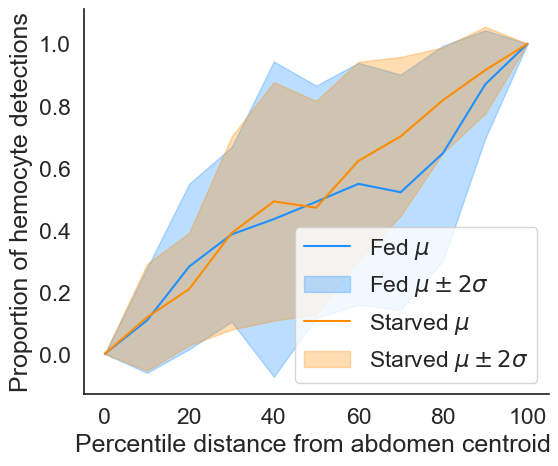

In [19]:
### Keeping the replicates separate and getting ECDFs for each replicate. 
### Max radii is max hemocyte distance
percentile_dist_persection_ecdfs_frames = list()

for section in hemocyte_coordinates['Image'].unique():
    percentile_dist_persection_ecdf = ECDF(hemocyte_coordinates[hemocyte_coordinates['Image']==section]['hemocyte_at_percentile_distance_maxdist'])
    #print(max(percentile_dist_persection_ecdf.y))
    #plt.plot(percentile_dist_persection_ecdf.x,percentile_dist_persection_ecdf.y)
    condition =  hemocyte_coordinates[hemocyte_coordinates['Image']==section]['condition'].unique()[0]
    percentile_dist_persection_ecdf_df = pd.DataFrame({"percentile_distance": percentile_dist_persection_ecdf.x,
                                                   "hemocyte_proportion": percentile_dist_persection_ecdf.y,
                                                   "image": section, "condition":condition})
    percentile_dist_persection_ecdfs_frames.append(percentile_dist_persection_ecdf_df)


percentile_dist_persection_ecdfs_frames_df = pd.concat(percentile_dist_persection_ecdfs_frames)

## At 100th percentile proportion is 1. Convert non 1 proportions to <100th percentile 
#percentile_dist_persection_ecdfs_frames_df['percentile_distance'] = np.where(
#   (percentile_dist_persection_ecdfs_frames_df['percentile_distance'] == 100) & 
#   (percentile_dist_persection_ecdfs_frames_df['hemocyte_proportion'] <1) , 90, percentile_dist_persection_ecdfs_frames_df['percentile_distance']
#   )

percentile_dist_persection_ecdfs_frames_df['percentile_distance'] = np.where(
   (percentile_dist_persection_ecdfs_frames_df['percentile_distance'] == 0) & 
   (percentile_dist_persection_ecdfs_frames_df['hemocyte_proportion'] > 0) , 10, percentile_dist_persection_ecdfs_frames_df['percentile_distance']
  )

percentile_dist_persection_ecdfs_frames_df['percentile_dist_cat'] = percentile_dist_persection_ecdfs_frames_df['percentile_distance'].replace(-np.inf,0).astype('category')
print(percentile_dist_persection_ecdfs_frames_df)
#percentile_dist_persection_ecdfs_frames_df['percentile_dist_cat'] = pd.cut(percentile_dist_persection_ecdfs_frames_df["percentile_distance"], 
#                                                bins=[-np.inf,0,10,20,30,40,50,60,70,80,90,99,100],
#                                                labels=[0,10,20,30,40,50,60,70,80,90,99,100])

percentile_dist_persection_ecdfs_frames_df_mean = percentile_dist_persection_ecdfs_frames_df[['condition','percentile_dist_cat','hemocyte_proportion']].groupby(['condition','percentile_dist_cat']).agg(['mean','std'])
percentile_dist_persection_ecdfs_frames_df_mean = percentile_dist_persection_ecdfs_frames_df_mean.droplevel(0,axis=1).reset_index()
percentile_dist_persection_ecdfs_frames_df_mean['mean+sd'] = percentile_dist_persection_ecdfs_frames_df_mean['mean']+2*percentile_dist_persection_ecdfs_frames_df_mean['std']
percentile_dist_persection_ecdfs_frames_df_mean['mean-sd'] = percentile_dist_persection_ecdfs_frames_df_mean['mean']-2*percentile_dist_persection_ecdfs_frames_df_mean['std']


fed = percentile_dist_persection_ecdfs_frames_df_mean[percentile_dist_persection_ecdfs_frames_df_mean['condition']=='Fed']
starved = percentile_dist_persection_ecdfs_frames_df_mean[percentile_dist_persection_ecdfs_frames_df_mean['condition']=='Starved']

fig,ax =plt.subplots(figsize=(6,5))
ax.plot(fed['percentile_dist_cat'],fed['mean'],color="dodgerblue", label="Fed")
ax.fill_between(fed['percentile_dist_cat'],fed['mean+sd'], fed['mean-sd'], color="dodgerblue", alpha=0.3)
ax.plot(starved['percentile_dist_cat'],starved['mean'],color="darkorange", label="Starved")
ax.fill_between(starved['percentile_dist_cat'],starved['mean+sd'], starved['mean-sd'], color="darkorange", alpha=0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel("Percentile distance from abdomen centroid ")
ax.set_ylabel("Proportion of hemocyte detections")
ax.legend(['Fed $\mu$','Fed $\mu \pm 2\sigma$' , 'Starved $\mu$','Starved $\mu \pm 2\sigma$'], bbox_to_anchor=(1,0), loc="lower right", )
#ax.set_xticklabels([0,'0-10','10-20','30-40','50-60','70-80','90-100'],rotation=45)


## Delaunay triangulation

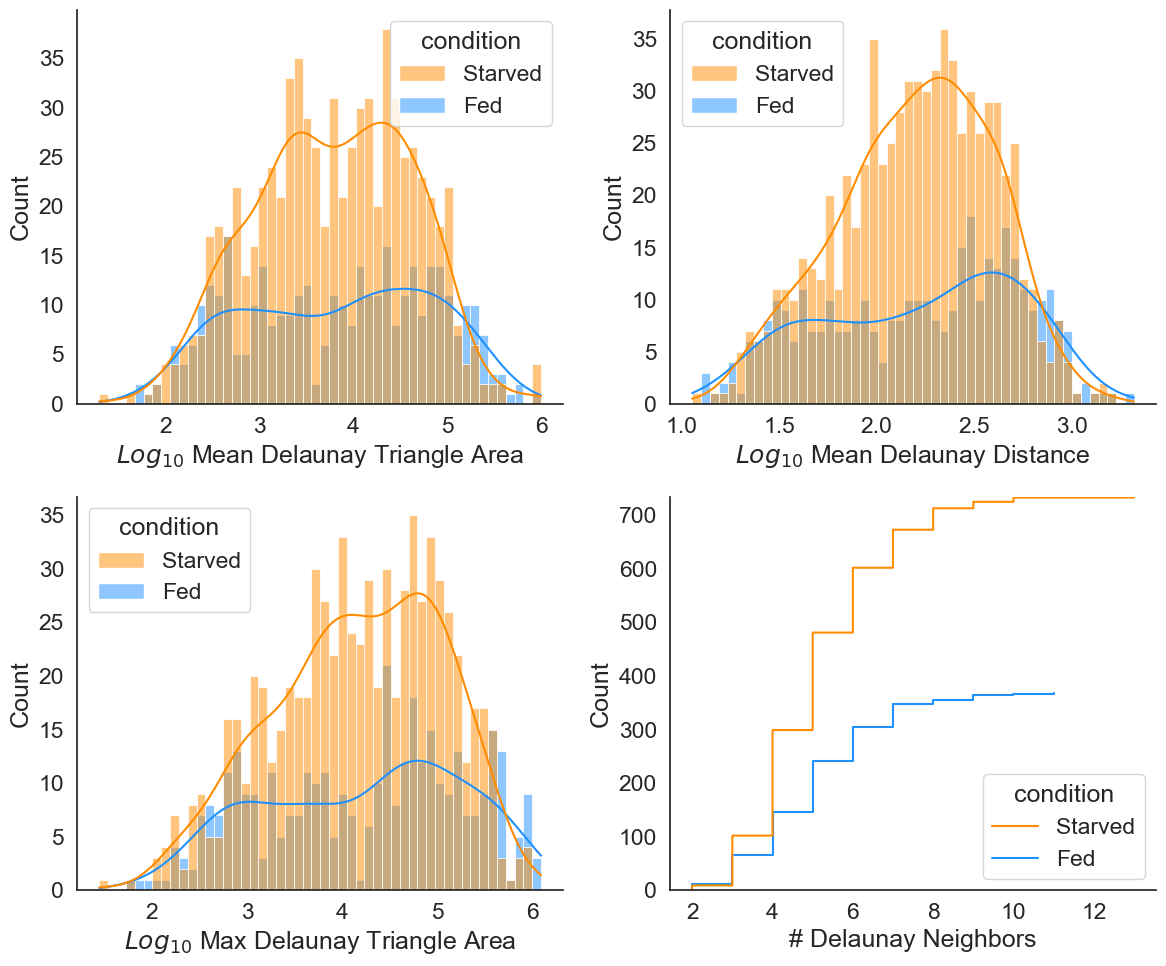

In [20]:
delauney_metrics = hemocyte_coordinates[['Image','condition','Delaunay: Num neighbors',
                                         'Delaunay: Mean distance', 'Delaunay: Median distance',
                                         'Delaunay: Max distance', 'Delaunay: Min distance',
                                         'Delaunay: Mean triangle area', 'Delaunay: Max triangle area','fly_ID','section_ID']]

delauney_metrics['log_mean_triangle_area'] = np.log10(delauney_metrics['Delaunay: Mean triangle area'])
delauney_metrics['log_mean_distance'] = np.log10(delauney_metrics['Delaunay: Mean distance'])
delauney_metrics['log_max_triangle_area'] = np.log10(delauney_metrics['Delaunay: Max triangle area'])

fig, ax = plt.subplots(2,2,figsize=(12,10))
sns.histplot(data=delauney_metrics, x='log_mean_triangle_area', hue='condition', palette=color_scheme, stat='count', kde=True, ax=ax[0,0], bins = 50)
ax[0,0].set_xlabel("$Log_{10}$ Mean Delaunay Triangle Area")
sns.histplot(data=delauney_metrics, x='log_mean_distance', hue='condition', palette=color_scheme, stat='count', kde=True, ax=ax[0,1], bins = 50)
ax[0,1].set_xlabel("$Log_{10}$ Mean Delaunay Distance")
sns.histplot(data=delauney_metrics, x='log_max_triangle_area', hue='condition', palette=color_scheme, stat='count', ax=ax[1,0], kde=True, bins = 50)  
ax[1,0].set_xlabel("$Log_{10}$ Max Delaunay Triangle Area")  
sns.ecdfplot(data=delauney_metrics, x='Delaunay: Num neighbors', hue='condition', palette=color_scheme, stat='count', ax=ax[1,1])         
ax[1,1].set_xlabel("# Delaunay Neighbors")   
sns.move_legend(ax[0,0],"upper right")
sns.move_legend(ax[1,1],"lower right")
sns.despine(right=True)

fig.tight_layout()
fig.savefig(outputs.joinpath("delaunay_triangulation.png"))
                              

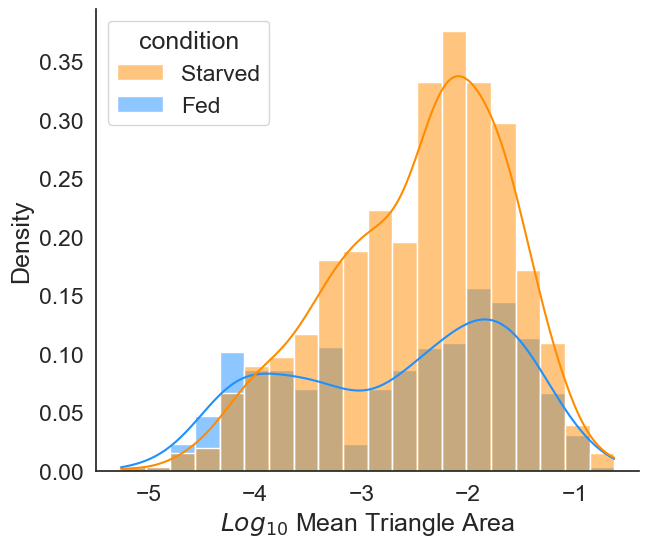

In [21]:
def get_delauney_areaprop(mean_tri_area, image_ID, adbomen_measurements):
    abdomen_area = adbomen_measurements.loc[adbomen_measurements['Image']==image_ID][area]
    mean_area_prop = np.log10(mean_tri_area/abdomen_area.iloc[0])

    return(mean_area_prop)
    

delauney_metrics['Delaunay_Mean_TriArea_Normed'] = delauney_metrics.apply(lambda row: 
                                                                            get_delauney_areaprop(row['Delaunay: Mean triangle area'], 
                                                                                                         row['Image'],
                                                                                                         abdomen_coordinates), 
                                                                                                         axis=1)

fig, ax = plt.subplots(figsize=(7,6))
sns.histplot(data=delauney_metrics, x='Delaunay_Mean_TriArea_Normed', hue='condition', palette=color_scheme, stat='density', kde=True, ax=ax, bins=20)
#ax.set_xlabel("$Log_{10}$ $\dfrac{Mean\  A_{dt}}{A_{ab}}$")
ax.set_xlabel("$Log_{10}$ Mean Triangle Area")
sns.despine(right=True)
sns.move_legend(ax,"upper left")


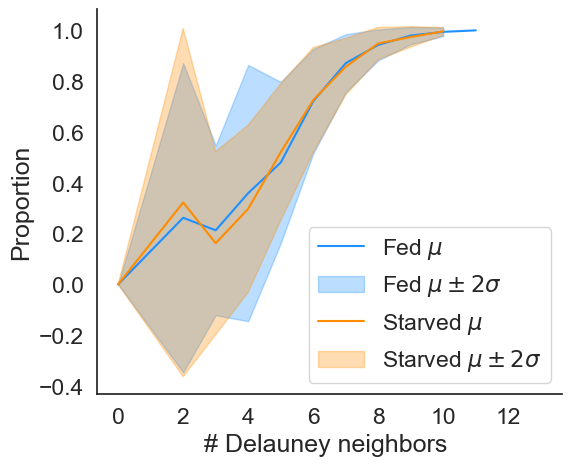

In [22]:
from matplotlib.ticker import MaxNLocator
num_neighbors_ecdfs = list()

for section in delauney_metrics['Image'].unique():
    num_neighbors_section_ecdf = ECDF(delauney_metrics[delauney_metrics['Image']==section]['Delaunay: Num neighbors'])
    #plt.plot(num_neighbors_section_ecdf.x,num_neighbors_section_ecdf.y)
    condition =  delauney_metrics[delauney_metrics['Image']==section]['condition'].unique()[0]
    section_ecdf_df = pd.DataFrame({"num_neighbors": num_neighbors_section_ecdf.x,"count": num_neighbors_section_ecdf.y,
                                    "image": section, "condition":condition})
    num_neighbors_ecdfs.append(section_ecdf_df)


    #break

num_neighbors_ecdfs_df = pd.concat(num_neighbors_ecdfs)

num_neighbors_ecdfs_df['num_neighbors_cat'] = num_neighbors_ecdfs_df['num_neighbors'].replace(-np.inf,0).astype('category')
num_neighbors_ecdfs_df_mean = num_neighbors_ecdfs_df[['condition','num_neighbors_cat','count']].groupby(['condition','num_neighbors_cat']).agg(['mean','std'])

num_neighbors_ecdfs_df_mean = num_neighbors_ecdfs_df_mean.droplevel(0,axis=1).reset_index()
num_neighbors_ecdfs_df_mean['mean+sd'] = num_neighbors_ecdfs_df_mean['mean']+2*num_neighbors_ecdfs_df_mean['std']
num_neighbors_ecdfs_df_mean['mean-sd'] = num_neighbors_ecdfs_df_mean['mean']-2*num_neighbors_ecdfs_df_mean['std']
fed = num_neighbors_ecdfs_df_mean[num_neighbors_ecdfs_df_mean['condition']=='Fed']
starved = num_neighbors_ecdfs_df_mean[num_neighbors_ecdfs_df_mean['condition']=='Starved']

fig,ax =plt.subplots(figsize=(6,5))
ax.plot(fed['num_neighbors_cat'],fed['mean'],color="dodgerblue", label="Fed")
ax.fill_between(fed['num_neighbors_cat'],fed['mean+sd'], fed['mean-sd'], color="dodgerblue", alpha=0.3)
ax.plot(starved['num_neighbors_cat'],starved['mean'],color="darkorange", label="Starved")
ax.fill_between(starved['num_neighbors_cat'],starved['mean+sd'], starved['mean-sd'], color="darkorange", alpha=0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_xticklabels([0,2,4,6,8,10,12,14])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("# Delauney neighbors ")
ax.set_ylabel("Proportion")
ax.legend(['Fed $\mu$','Fed $\mu \pm 2\sigma$' , 'Starved $\mu$','Starved $\mu \pm 2\sigma$'])




Index(['Image', 'condition', 'Delaunay: Num neighbors',
       'Delaunay: Mean distance', 'Delaunay: Median distance',
       'Delaunay: Max distance', 'Delaunay: Min distance',
       'Delaunay: Mean triangle area', 'Delaunay: Max triangle area', 'fly_ID',
       'section_ID', 'log_mean_triangle_area', 'log_mean_distance',
       'log_max_triangle_area', 'Delaunay_Mean_TriArea_Normed'],
      dtype='object')


<Axes: xlabel='condition', ylabel='Delaunay: Num neighbors'>

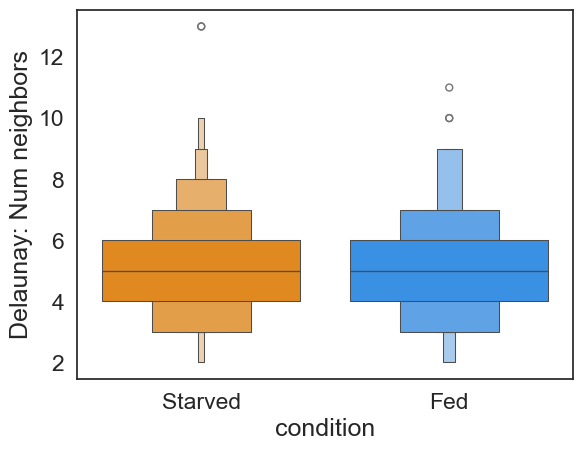

In [23]:
print(delauney_metrics.columns)
sns.boxenplot(data=delauney_metrics,y='Delaunay: Num neighbors',x='condition',palette=color_scheme)